In [25]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from datetime import datetime, timedelta
from sqlalchemy import func

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [11]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [15]:

# Create session (link) from Python to the DB
Session = sessionmaker(bind=engine)
session = Session()

# Exploratory Precipitation Analysis

In [20]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"Most recent date in the dataset: {most_recent_date[0]}")

Date one year before the most recent date: 2016-08-23


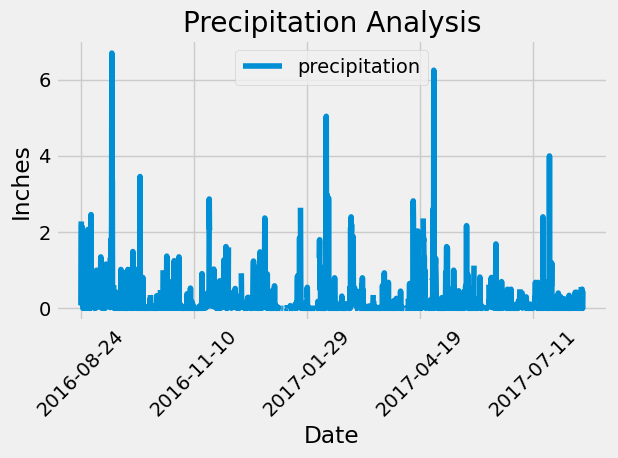

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculating the date one year from the last date in data set.
most_recent_date_str = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

# Converting the most recent date string to a datetime object
most_recent_date = datetime.strptime(most_recent_date_str, '%Y-%m-%d')


# Calculateing the date one year before the most recent date
one_year_before = most_recent_date - timedelta(days=365)
print(f"Date one year before the most recent date: {one_year_before.date()}")

# Performing a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > one_year_before).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Loading the query results into a Pandas DataFrame
precip_df = pd.DataFrame(precipitation_data, columns=['date', 'precipitation'])

# Sorting the dataframe by date
precip_df.sort_values(by='date', inplace=True)
# Using Pandas Plotting with Matplotlib to plot the data
import matplotlib.pyplot as plt

# Plotting the data
precip_df.plot(x='date', y='precipitation')
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation Analysis")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()
print(f"Total number of stations: {total_stations}")

Total number of stations: 9


In [28]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.station).desc()).all()

for station, count in most_active_stations:
    print(f"Station {station} has {count} observations")

Station USC00519281 has 2772 observations
Station USC00519397 has 2724 observations
Station USC00513117 has 2709 observations
Station USC00519523 has 2669 observations
Station USC00516128 has 2612 observations
Station USC00514830 has 2202 observations
Station USC00511918 has 1979 observations
Station USC00517948 has 1372 observations
Station USC00518838 has 511 observations


In [32]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = most_active_stations[0][0]
print(f"Most active station ID: {most_active_station_id}")
# Calculating the lowest, highest, and average temperature
sel = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
lowest_temp, highest_temp, avg_temp = session.query(*sel).\
                                      filter(Measurement.station == most_active_station_id).\
                                      one()

print(f"Lowest Temperature: {lowest_temp}\nHighest Temperature: {highest_temp}\nAverage Temperature: {avg_temp:.2f}")

Most active station ID: USC00519281
Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66


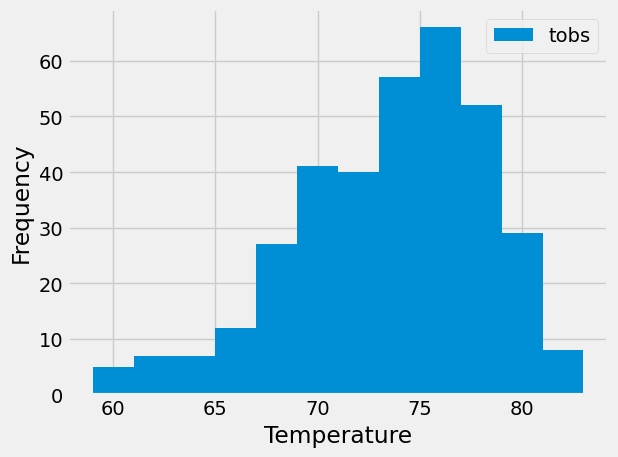

Text(0.5, 0.5, 'Temperature')


In [45]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_months_tobs = session.query(Measurement.tobs).\
                      filter(Measurement.station == most_active_station_id).\
                      filter(Measurement.date > one_year_before).\
                      order_by(Measurement.date).all()

# Converting query result to a list of temperatures
temperatures = [temp[0] for temp in last_12_months_tobs]

# Ploting the results as a histogram with `bins=12`
tobs_df.plot(kind="hist", bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
# Including average temperature in the title
plt.tight_layout()
plt.show()
# Displaying the Text object representation
print(text_object)

# Close Session

In [46]:
# Close Session
session.close()